In [1]:
# Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.parser import parse
from pandas.plotting import scatter_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
import os 
cwd = os.getcwd()
print('Current folder is {}'.format(cwd))

Current folder is C:\Users\toddr\Desktop\HospitalNoShow


In [3]:
def get_gender_classification(gender):
    if gender == 'F':
        return 0
    elif gender == 'M':
        return 1
    else:
        return -1
    
def get_noshow_classification(noshow):
    if noshow == 'No':
        return 0
    elif noshow == 'Yes':
        return 1
    else:
        return -1
    
def get_neighbourhood_classification(neighbour):
    i, = np.where(neighbourhood == neighbour)
    return i[0]

def get_days(sch , app):
    a = app[0:10]
    b = parse(a)    
    c = sch[0:10]
    d = parse(c)
    return (b - d)

def get_age_classification(age):
    if (age<=1):
        return age
    elif (age<65):
        return 2
    else:
        return 3

def add_data(row):
    row.gender = get_gender_classification(row.gender)
    row.noshow = get_noshow_classification(row.noshow)
    row.neighbourhood = get_neighbourhood_classification(row.neighbourhood)
    row.agegroup = get_age_classification(row.age)
    day1 = parse(row.scheduledday[0:10])
    day2 = parse(row.appointmentday[0:10])
    row.daysbefore = (day2 - day1).days
    row.appointmentdayofweek = datetime.weekday(day2)
    return row

In [148]:
# Load dataset
data = pd.read_csv("Data\KaggleV2-May-2016.csv")
data = shuffle(data)
data = data[:5000]  #get first 5000 rows

# Dimensions of dataset
n = data.shape[0] #rows
p = data.shape[1] #columns

# Lower case all column header
data.columns = [x.lower() for x in data.columns]

# Rename several DataFrame columns
data = data.rename(columns = {
    'sms_received' : 'smsreceived',
    'no-show':'noshow',
})

print('n = {} and p = {}'.format(n, p))

n = 5000 and p = 14


In [149]:
# shape
print('Dataset''s shape: {}'.format(data.shape))

# add 2 columns
data.insert(7, 'agegroup', 0)
data.insert(5, 'daysbefore', 0) #how many days from scheduled day to appointment day
data.insert(5, 'appointmentdayofweek', 0)  #what is the day of week of the appointment day

# head
print(data.head(2))

# descriptions
# print(data.describe())

Datasets shape: (5000, 14)
           patientid  appointmentid gender          scheduledday  \
104401  8.347981e+11        5767570      M  2016-06-02T18:45:26Z   
108837  8.534397e+14        5788235      F  2016-06-08T11:39:35Z   

              appointmentday  appointmentdayofweek  daysbefore  age  \
104401  2016-06-06T00:00:00Z                     0           0   50   
108837  2016-06-08T00:00:00Z                     0           0   37   

              neighbourhood  agegroup  scholarship  hipertension  diabetes  \
104401            DO CABRAL         0            0             1         0   
108837  ILHA DE SANTA MARIA         0            0             0         0   

        alcoholism  handcap  smsreceived noshow  
104401           0        0            1     No  
108837           0        0            0     No  


In [150]:
neighbourhood = data.neighbourhood.unique()
print(neighbourhood)

['DO CABRAL' 'ILHA DE SANTA MARIA' 'SANTA TEREZA' 'SANTO ANTÔNIO'
 'MONTE BELO' 'JARDIM CAMBURI' 'MARIA ORTIZ' 'REDENÇÃO' 'FORTE SÃO JOÃO'
 'SANTO ANDRÉ' 'ILHA DAS CAIEIRAS' 'PRAIA DO SUÁ' 'DO QUADRO'
 'RESISTÊNCIA' 'BONFIM' 'JARDIM DA PENHA' 'CENTRO' 'ROMÃO' 'CRUZAMENTO'
 'SÃO BENEDITO' 'GOIABEIRAS' 'JABOUR' 'MATA DA PRAIA' 'ITARARÉ'
 'TABUAZEIRO' 'GURIGICA' 'PIEDADE' 'DA PENHA' 'SANTOS DUMONT' 'ANDORINHAS'
 'SÃO CRISTÓVÃO' 'PARQUE MOSCOSO' 'CARATOÍRA' 'NOVA PALESTINA'
 'MÁRIO CYPRESTE' 'ESTRELINHA' 'INHANGUETÁ' 'PRAIA DO CANTO'
 'SANTA MARTHA' 'FONTE GRANDE' 'COMDUSA' 'SÃO JOSÉ' 'SANTA CLARA'
 'FRADINHOS' 'ILHA DO PRÍNCIPE' 'SANTOS REIS' 'CONSOLAÇÃO'
 'JESUS DE NAZARETH' 'MARUÍPE' 'SÃO PEDRO' 'GRANDE VITÓRIA' 'DE LOURDES'
 'JUCUTUQUARA' 'JOANA D´ARC' 'BENTO FERREIRA' 'VILA RUBIM'
 'BARRO VERMELHO' 'BELA VISTA' 'SOLON BORGES' 'ILHA DO BOI'
 'ENSEADA DO SUÁ' 'BOA VISTA' 'SANTA HELENA' 'SANTA CECÍLIA' 'DO MOSCOSO'
 'REPÚBLICA' 'SEGURANÇA DO LAR' 'CONQUISTA' 'SANTA LÚCIA'
 'ARIOVALDO FAV

In [151]:
data = data.apply(lambda row: add_data(row), axis=1)

In [152]:
print(data.head(5))
data.groupby(['appointmentdayofweek','noshow']).size().reset_index(name='counts')

           patientid  appointmentid  gender          scheduledday  \
104401  8.347981e+11        5767570       1  2016-06-02T18:45:26Z   
108837  8.534397e+14        5788235       0  2016-06-08T11:39:35Z   
23610   1.697991e+13        5541060       1  2016-04-05T07:38:10Z   
37612   9.727743e+13        5679774       0  2016-05-10T10:27:59Z   
63829   5.575876e+13        5696012       1  2016-05-13T11:24:52Z   

              appointmentday  appointmentdayofweek  daysbefore  age  \
104401  2016-06-06T00:00:00Z                     0           4   50   
108837  2016-06-08T00:00:00Z                     2           0   37   
23610   2016-05-04T00:00:00Z                     2          29   46   
37612   2016-05-16T00:00:00Z                     0           6   40   
63829   2016-05-16T00:00:00Z                     0           3   58   

        neighbourhood  agegroup  scholarship  hipertension  diabetes  \
104401              0         2            0             1         0   
108837        

,appointmentdayofweek,noshow,counts
0,0,0,833
1,0,1,226
2,1,0,925
3,1,1,205
4,2,0,957
5,2,1,225
6,3,0,618
7,3,1,149
8,4,0,672
9,4,1,189


In [153]:
#drop 3 columns that we don't need
# data.drop('patientid', axis=1, inplace=True)
data.drop('appointmentid', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('appointmentday', axis=1, inplace=True)#axis=1 means apply for each row
data.drop('scheduledday', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('appointmentdayofweek', axis=1, inplace=True) #axis=1 means apply for each row 
data.drop('age', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('agegroup', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('daysbefore', axis=1, inplace=True) #axis=1 means apply for each row 
data.drop('neighbourhood', axis=1, inplace=True) #axis=1 means apply for each row 
data.drop('alcoholism', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('diabetes', axis=1, inplace=True) #axis=1 means apply for each row
# data.drop('gender', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('handcap', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('scholarship', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('hipertension', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('smsreceived', axis=1, inplace=True) #axis=1 means apply for each row

In [154]:
# checking
print(data.head(2))
print('n = {} and p = {}'.format(data.shape[0], data.shape[1]))

           patientid  gender  daysbefore  agegroup  noshow
104401  8.347981e+11       1           4         2       0
108837  8.534397e+14       0           0         2       0
n = 5000 and p = 5


In [155]:
# Split-out validation dataset (No-show column only)
col = len(data.columns) - 1
array = data.values   #numpy array
X = array[:,0:col]#numpy array - 11 first columns
Y = array[:,col]  #numpy array - the 12st column
print(X[0:2,])  #print top 2 rows
print(Y[0:2,])  #print top 2 rows
print(X.size)

[[8.34798139e+11 1.00000000e+00 4.00000000e+00 2.00000000e+00]
 [8.53439687e+14 0.00000000e+00 0.00000000e+00 2.00000000e+00]]
[0. 0.]
20000


In [156]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print('{}'.format(X_train, Y_train))

[[1.87469445e+13 0.00000000e+00 0.00000000e+00 3.00000000e+00]
 [3.67334844e+12 1.00000000e+00 2.00000000e+00 2.00000000e+00]
 [7.21784413e+13 0.00000000e+00 2.10000000e+01 2.00000000e+00]
 ...
 [5.17835784e+11 0.00000000e+00 1.50000000e+01 2.00000000e+00]
 [1.51347924e+14 0.00000000e+00 8.00000000e+00 2.00000000e+00]
 [9.19696828e+13 1.00000000e+00 4.20000000e+01 2.00000000e+00]]


In [157]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print('{}'.format(X_train, Y_train))

[[1.87469445e+13 0.00000000e+00 0.00000000e+00 3.00000000e+00]
 [3.67334844e+12 1.00000000e+00 2.00000000e+00 2.00000000e+00]
 [7.21784413e+13 0.00000000e+00 2.10000000e+01 2.00000000e+00]
 ...
 [5.17835784e+11 0.00000000e+00 1.50000000e+01 2.00000000e+00]
 [1.51347924e+14 0.00000000e+00 8.00000000e+00 2.00000000e+00]
 [9.19696828e+13 1.00000000e+00 4.20000000e+01 2.00000000e+00]]


In [158]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [159]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.801250 (0.023618)
LDA: 0.792250 (0.023007)
KNN: 0.768000 (0.022439)
CART: 0.708750 (0.014843)
NB: 0.801250 (0.023618)
SVM: 0.800500 (0.024464)


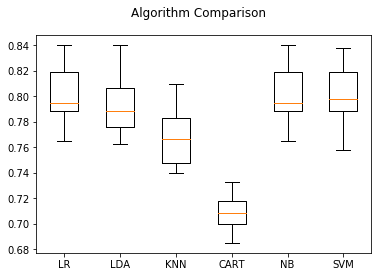

In [160]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [161]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.769
[[755  46]
 [185  14]]
             precision    recall  f1-score   support

        0.0       0.80      0.94      0.87       801
        1.0       0.23      0.07      0.11       199

avg / total       0.69      0.77      0.72      1000

